In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

from src.metrics import wgss_score, dunn_score, sd_dis_score
%matplotlib inline

In [20]:
sns.set_style('whitegrid')

In [21]:
el_list = []
sl_list = []
db_list = []
du_list = []
sd_list = []

In [22]:
data, target = load_digits(return_X_y=True)
scaler = MinMaxScaler()
model_yb = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_yb,k=(2,20),metric='distortion')

In [23]:
scaled_data = scaler.fit_transform(data)

In [24]:
steps = list(range(2,21))
for i in steps:
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(scaled_data)
    y_pred = model.predict(scaled_data)
    el_list.append(wgss_score(scaled_data,y_pred))
    sl_list.append(silhouette_score(scaled_data,y_pred))
    db_list.append(davies_bouldin_score(scaled_data,y_pred))
    du_list.append(dunn_score(scaled_data,y_pred))
    sd_list.append(sd_dis_score(scaled_data,y_pred))
ng_sl = int(sl_list.index(max(sl_list)) + 2)
ng_du = int(du_list.index(max(du_list)) + 2)
ng_db = int(db_list.index(min(db_list)) + 2)
ng_sd = int(sd_list.index(min(sd_list)) + 2)
distances = []
p1x = 2
p1y = el_list[0]
p2x = 20
p2y = el_list[(20 - 2)]
for i in range((20 - 1) ):
    x = 2 + i
    y = el_list[i]
    x_diff = p2x - p1x
    y_diff = p2y - p1y
    num = abs(y_diff*x - x_diff*y + p2x*p1y - p2y*p1x)
    distances.append(num)
ng_el = int(distances.index(max(distances)) + 2)

In [25]:
ng_sl

9

In [26]:
ng_du

9

In [27]:
ng_db

9

In [28]:
ng_sd

9

In [29]:
ng_el

9

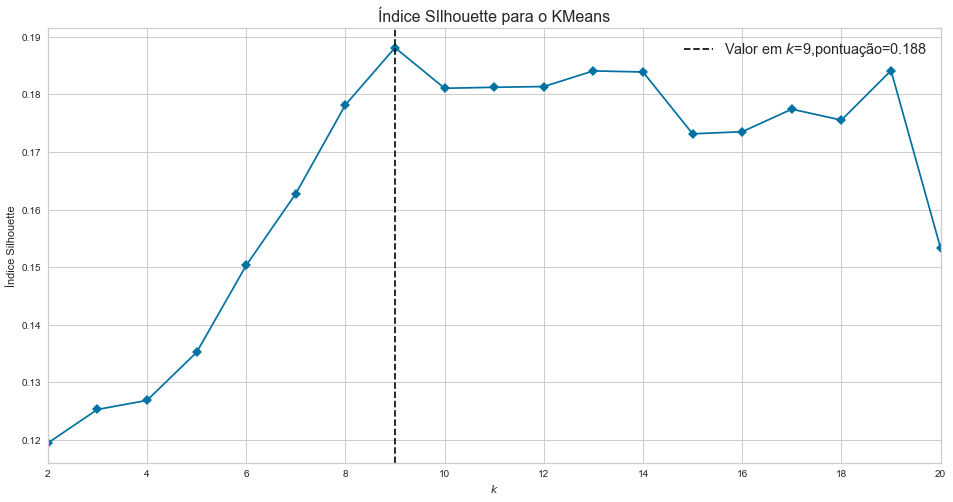

In [41]:
plt.figure(figsize=(16,8))
plt.plot(steps,sl_list,'bD-')
plt.xlabel('$k$')
plt.ylabel('Índice Silhouette')
plt.xlim(2,20)
plt.axvline(x=ng_sl,color='k',linestyle='--',label=f'Valor em $k$={ng_sl},pontuação={max(sl_list):.3f}')
plt.title("Índice Silhouette para o KMeans",fontsize=16)
plt.legend(loc='upper right',fontsize='large')

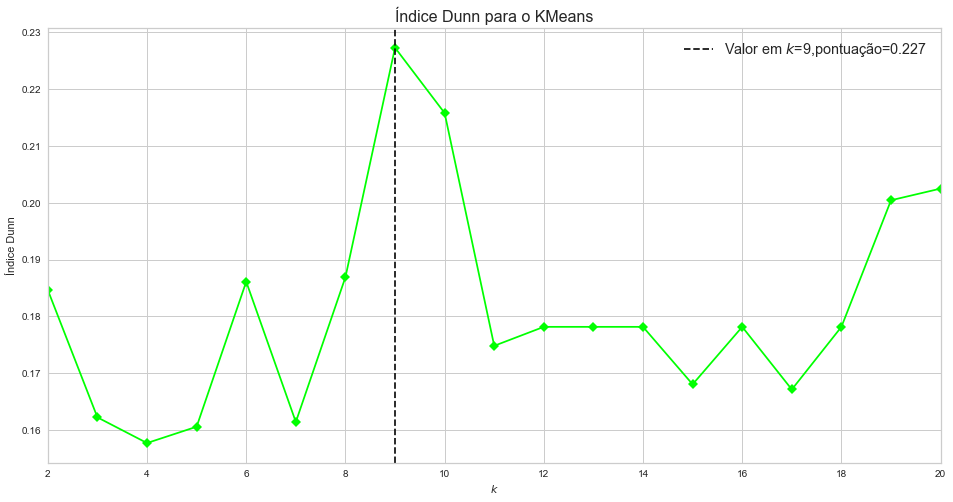

In [47]:
plt.figure(figsize=(16,8))
plt.plot(steps,du_list,'gD-',color=(0,1,0,1))
plt.xlabel('$k$')
plt.ylabel('Índice Dunn')
plt.xlim(2,20)
plt.axvline(x=ng_du,color='k',linestyle='--',label=f'Valor em $k$={ng_du},pontuação={max(du_list):.3f}')
plt.title("Índice Dunn para o KMeans",fontsize=16)
plt.legend(loc='upper right',fontsize='large')

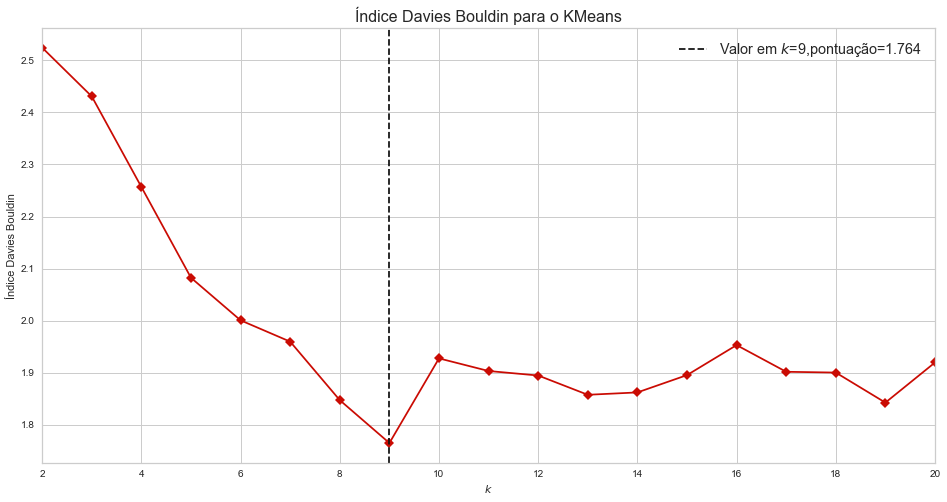

In [48]:
plt.figure(figsize=(16,8))
plt.plot(steps,db_list,'rD-')
plt.xlabel('$k$')
plt.ylabel('Índice Davies Bouldin')
plt.xlim(2,20)
plt.axvline(x=ng_sl,color='k',linestyle='--',label=f'Valor em $k$={ng_db},pontuação={min(db_list):.3f}')
plt.title("Índice Davies Bouldin para o KMeans",fontsize=16)
plt.legend(loc='upper right',fontsize='large')

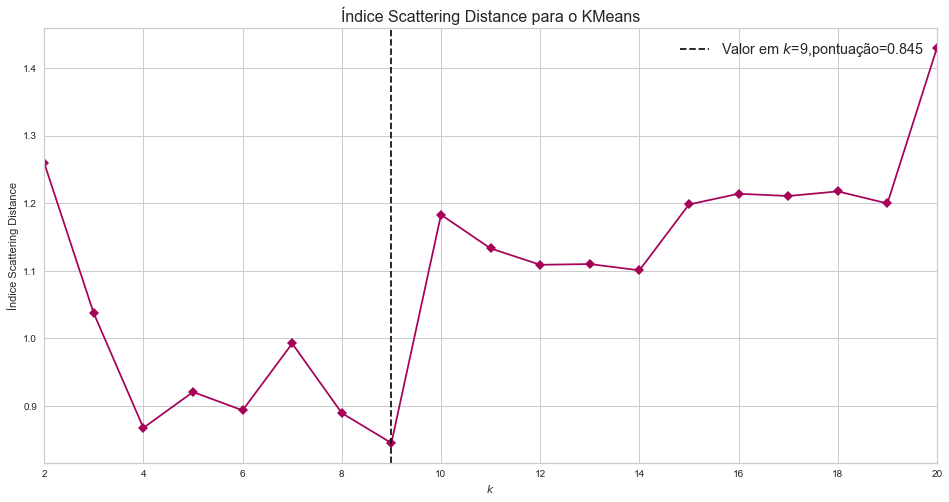

In [49]:
plt.figure(figsize=(16,8))
plt.plot(steps,sd_list,'mD-')
plt.xlabel('$k$')
plt.ylabel('Índice Scattering Distance')
plt.xlim(2,20)
plt.axvline(x=ng_sd,color='k',linestyle='--',label=f'Valor em $k$={ng_sd},pontuação={min(sd_list):.3f}')
plt.title("Índice Scattering Distance para o KMeans",fontsize=16)
plt.legend(loc='upper right',fontsize='large')

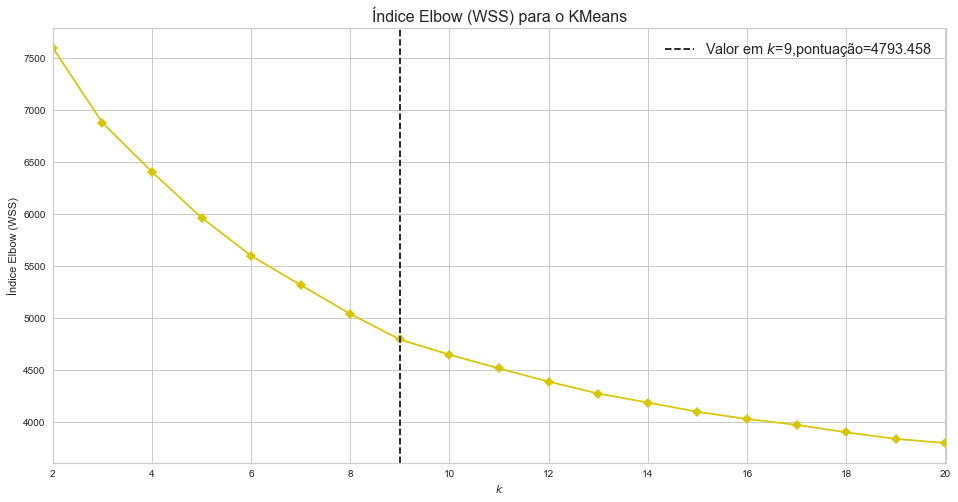

In [54]:
plt.figure(figsize=(16,8))
plt.plot(steps,el_list,'yD-')
plt.xlabel('$k$')
plt.ylabel('Índice Elbow (WSS)')
plt.xlim(2,20)
plt.axvline(x=ng_el,color='k',linestyle='--',label=f'Valor em $k$={ng_el},pontuação={el_list[7]:.3f}')
plt.title("Índice Elbow (WSS) para o KMeans",fontsize=16)
plt.legend(loc='upper right',fontsize='large')

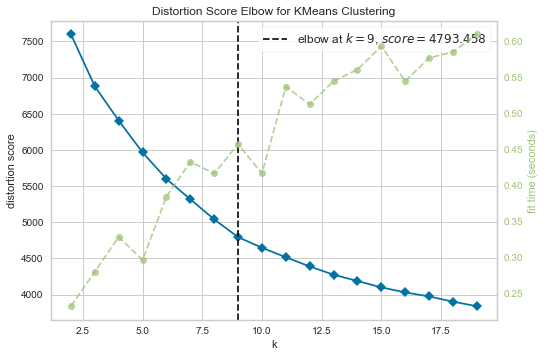

In [51]:
visualizer.fit(scaled_data)
visualizer.show()